# Table of Content

## Midterm
#### 1. Import and Upgrade library package
#### 2. Data Dscription 
- 2.1 Preview Data
- 2.2 Data visualization before data cleaning

#### 3. Data Preparation and Cleaning
#### 4. Exploratory Data Analysis
- 4.1 Visualize Central Tendency, Dispersion, Skewness
- 4.2 Visualize the feature correlations
- 4.3 Visualize relations between a single variable and the diabetes test result
- 4.4 Visualize the comparison of a single feature between Age Groups
- 4.5 Hypothesis Test (updated*)

#### 5. Multiple Linear Regression

#### 6. Anova Modeling
- 6.1 Conduct a two-way ANOVA test (updated**)
- 6.2 Multiple pairwise comparisons (Post-hoc test)
- 6.3 Test ANOVA assumptions
    
## Final
#### 7. ANCOVA Analysis
- 7.1 ANCOVA test 
- 7.2 Post-hoc test
- 7.3 Test ANCOVA assumptions

#### 8. Power Analysis
given a variety of effect sizes, Type II error and sample sizes for this dataset
## Update on midterm analysis with the feedback received.
- *Confidence intervals, Parameter estimates not calculated or discussed. 
- **Effect sizes calculated but not organized in formatted table

## 1. Import & Upgrade library package

In [1]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import mode
from scipy.stats import skew
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
from pingouin import ancova

In [3]:
pd.__version__

'1.4.1'

In [4]:
!pip install sns --upgrade

Requirement already up-to-date: sns in /opt/conda/lib/python3.8/site-packages (0.1)


In [5]:
sns.__version__

'0.11.2'

In [6]:
!pip install scipy --upgrade 

Requirement already up-to-date: scipy in /opt/conda/lib/python3.8/site-packages (1.8.0)


## 2. Data Description

In [7]:
#Read Diabetes Dataset from local folder
#diabetes_dataset = pd.read_csv('/Users/nanwang/Library/Mobile Documents/com~apple~CloudDocs/Documents/MI/INF2178/Midterm/diabetes.csv')
diabetes_dataset = pd.read_csv('diabetes.csv')

### 2.1 Preview Data

In [8]:
#Display the first 20 rows from Diabetes Dataset
diabetes_dataset.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [9]:
# Check number of rows and number of columns of a dataframe as an element.
diabetes_dataset.shape

(768, 9)

In [10]:
# Check the total number of elements present in dataframe
diabetes_dataset.size

6912

In [11]:
#Check the column name of the dataframe.
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
#Check non-null count and datatypes of each column of the dataframe.
diabetes_dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
#Check if there were duplicate rows
df_dedupped = diabetes_dataset.drop_duplicates()
print(df_dedupped.shape)
print(diabetes_dataset.shape)

(768, 9)
(768, 9)


In [14]:
diabetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [15]:
diabetes_dataset[diabetes_dataset['Glucose'] == 0 ]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1

In [16]:
diabetes_dataset[diabetes_dataset['BloodPressure'] == 0 ]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
15             7      100              0              0        0  30.0   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
78             0      131              0              0        0  43.2   
81             2       74              0              0        0   0.0   
172            2       87              0             23        0  28.9   
193           11      135              0              0        0  52.3   
222            7      119              0              0        0  25.2   
261            3      141              0              0        0  30.0   
266            0      138              0              0        0  36.3   
269            2      146              0              0        0  27.5   
300            0      167              0              0        0  32.3   
332            1      180              0              0        0  43.3   
336            0      117              0              0        0  33.8   
347            3      116              0              0        0  23.5   
357           13      129              0             30        0  39.9   
426            0       94              0              0        0   0.0   
430            2       99              0              0        0  22.2   
435            0      141              0              0        0  42.4   
453            2      119              0              0        0  19.6   
468            8      120              0              0        0  30.0   
484            0      145              0              0        0  44.2   
494            3       80              0              0        0   0.0   
522            6      114              0              0        0   0.0   
533            6       91              0              0        0  29.8   
535            4      132              0              0        0  32.9   
589            0       73              0              0        0  21.1   
601            6       96              0              0        0  23.7   
604            4      183              0              0        0  28.4   
619            0      119              0              0        0  32.4   
643            4       90              0              0        0  28.0   
697            0       99              0              0        0  25.0   
703            2      129              0              0        0  38.5   
706           10      115              0              0        0   0.0   

     DiabetesPedigreeFunction  Age  Outcome  
7                       0.134   29        0  
15                      0.484   32        1  
49                      0.305   24        0  
60                      0.304   21        0  
78                      0.270   26        1  
81                      0.102   22        0  
172                     0.773   25        0  
193                     0.578   40        1  
222                     0.209   37        0  
261                     0.761   27        1  
266                     0.933   25        1  
269                     0.240   28        1  
300                     0.839   30        1  
332                     0.282   41        1  
336                     0.932   44        0  
347                     0.187   23        0  
357                     0.569   44        1  
426                     0.256   25        0  
430                     0.108   23        0  
435                     0.205   29        1  
453                     0.832   72        0  
468                     0.183   38        1  
484                     0.630   31        1  
494                     0.174   22        0  
522                     0.189   26        0  
533                     0.501   31        0  
535                     0.302   23        1  
589                     0.342   25        0  
601   

In [17]:
diabetes_dataset[diabetes_dataset['SkinThickness'] == 0 ]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8      183             64              0        0  23.3   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
757            0      123             72              0        0  36.3   
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
762            9       89             62              0        0  22.5   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
9                       0.232   54        1  
10                      0.191   30        0  
..                        ...  ...      ...  
757                     0.258   52        1  
758                     0.197   26        0  
759                     0.278   66        1  
762                     0.142   33        0  
766                     0.349   47        1  

[227 rows x 9 columns]

In [18]:
diabetes_dataset[diabetes_dataset['Insulin'] == 0 ]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
764            2      122             70             27        0  36.8   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
..                        ...  ...      ...  
761                     0.403   43        1  
762                     0.142   33        0  
764                     0.340   27        0  
766                     0.349   47        1  
767                     0.315   23        0  

[374 rows x 9 columns]

In [19]:
diabetes_dataset[diabetes_dataset['BMI'] == 0 ]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9              8      125             96              0        0  0.0   
49             7      105              0              0        0  0.0   
60             2       84              0              0        0  0.0   
81             2       74              0              0        0  0.0   
145            0      102             75             23        0  0.0   
371            0      118             64             23       89  0.0   
426            0       94              0              0        0  0.0   
494            3       80              0              0        0  0.0   
522            6      114              0              0        0  0.0   
684            5      136             82              0        0  0.0   
706           10      115              0              0        0  0.0   

     DiabetesPedigreeFunction  Age  Outcome  
9                       0.232   54        1  
49                      0.305   24        0  
60                      0.304   21        0  
81                      0.102   22        0  
145                     0.572   21        0  
371                     1.731   21        0  
426                     0.256   25        0  
494                     0.174   22        0  
522                     0.189   26        0  
684                     0.640   69        0  
706                     0.261   30        1

### 2.2 Data visualization before data cleaning 

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

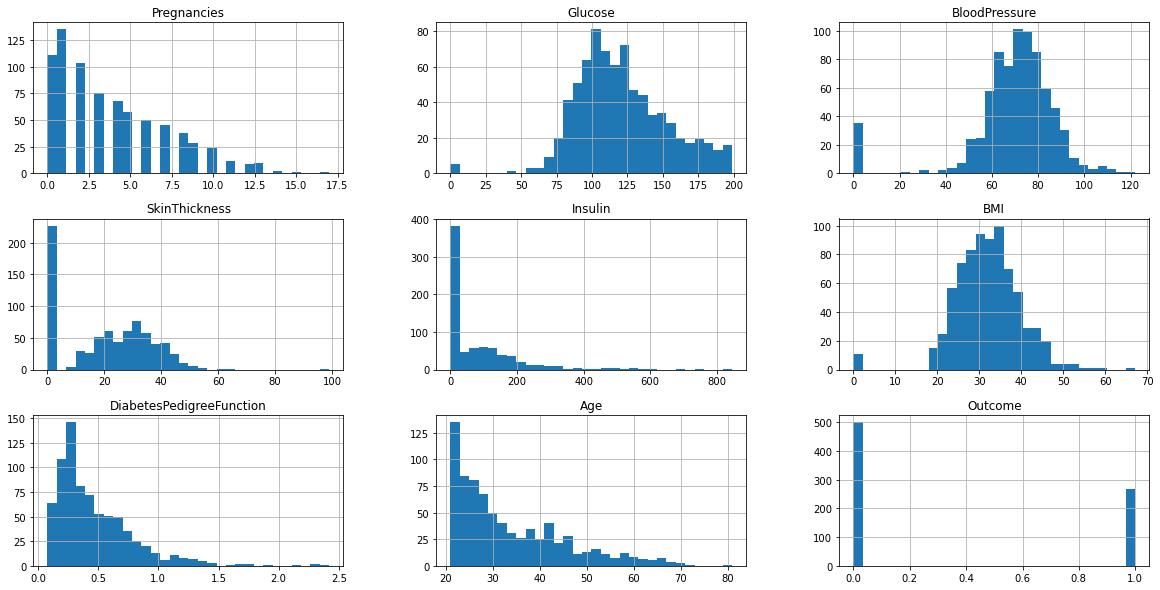

In [20]:
diabetes_dataset.hist(bins=30,figsize=(20,10))
#plt.savefig('histogram of each feature with the value of zero.png')

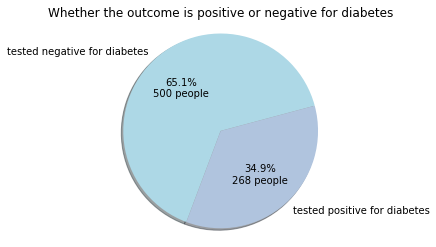

In [21]:
#Count Outcomes
diabetes_dataset['Outcome'].value_counts()

#Visualize Outcomes
my_labels = 'tested negative for diabetes','tested positive for diabetes'
counts = diabetes_dataset['Outcome'].value_counts()
my_colors = ['lightblue','lightsteelblue','silver']
my_autopac = lambda p:f'{p:.1f}%\n{p*sum(counts)/100 :.0f} people'
# Creating plot
plt.pie(counts, labels=my_labels, autopct=my_autopac, startangle=15, shadow = True, colors=my_colors)
plt.title('Whether the outcome is positive or negative for diabetes')
plt.axis('equal')

plt.show()
#plt.savefig('Proportion of people with diabetes vs. without diabetes.png')

## 3. Data Preparation and Cleaning

In [22]:
#Read Diabetes Dataset from local folder again
#df = pd.read_csv('/Users/nanwang/Library/Mobile Documents/com~apple~CloudDocs/Documents/MI/INF2178/Midterm/diabetes.csv')
df = pd.read_csv('diabetes.csv')

In [23]:
#On these columns, a value of zero was identified in dataset exploring. 
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
#Zero does not make sense, so we will indicate them as missing value, replaced by NaN 
df[cols] = df[cols].replace({'0':np.nan, 0:np.nan})

In [24]:
df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
558           11    103.0           68.0           40.0      NaN  46.2   
603            7    150.0           78.0           29.0    126.0  35.2   
414            0    138.0           60.0           35.0    167.0  34.6   
456            1    135.0           54.0            NaN      NaN  26.7   
717           10     94.0           72.0           18.0      NaN  23.1   
32             3     88.0           58.0           11.0     54.0  24.8   
399            3    193.0           70.0           31.0      NaN  34.9   
405            2    123.0           48.0           32.0    165.0  42.1   
607            1     92.0           62.0           25.0     41.0  19.5   
557            8    110.0           76.0            NaN      NaN  27.8   

     DiabetesPedigreeFunction  Age  Outcome  
558                     0.126   42        0  
603                     0.692   54        1  
414                     0.534   21        1  
456                     0.687   62        0  
717                     0.595   56        0  
32                      0.267   22        0  
399                     0.241   25        1  
405                     0.520   26        0  
607                     0.482   25        0  
557                     0.237   58        0

In [25]:
#Showing the count of Nans
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

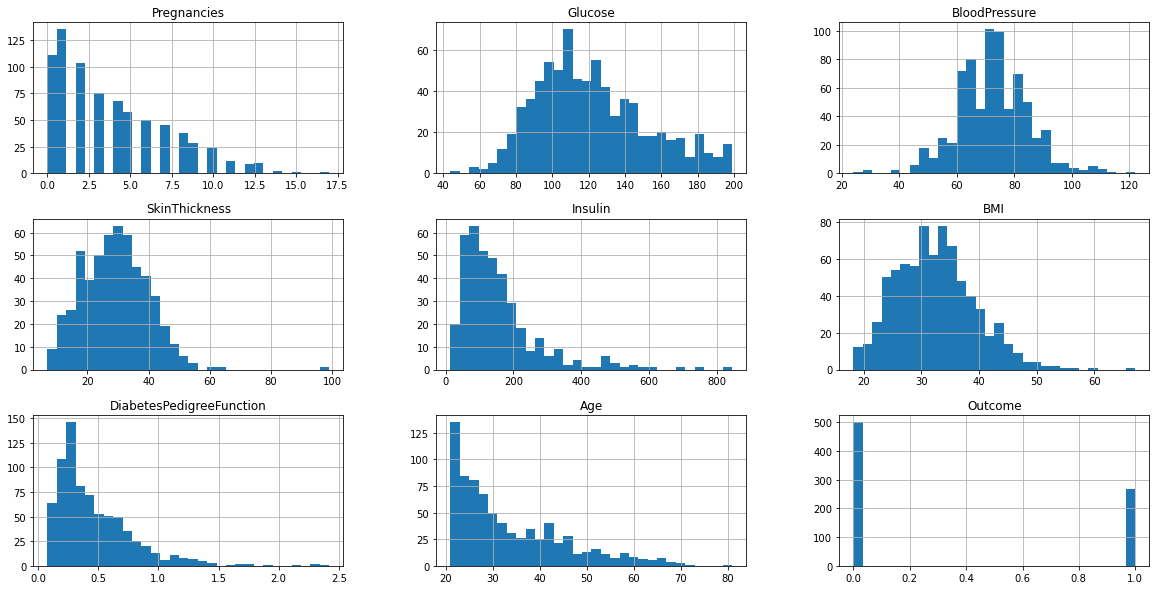

In [26]:
df.hist(bins=30,figsize=(20,10))
#plt.savefig('hisgram without a value of Zero.png')

In [27]:
#Replace NaN value by mean or median in accordance with thier distribution
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [28]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.108073  140.671875   
std       3.369578   30.435949      12.096346       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [29]:
#Copy column 'Outcome', rename it to'Test'
df['Test'] = df['Outcome']

In [30]:
#Change numerical data of Test to categorical data
df['Test'] = pd.Categorical(df.Test)
df['Test'] = df['Test'].cat.rename_categories({1:"Positive", 0:"Negative"})
#Showing value type for each colomn
df.dtypes

Pregnancies                    int64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
Test                        category
dtype: object

In [31]:
# Add a new column category "Age Group" next to the Age column. 
category_1 = pd.cut(df['Age'], bins = [18,34,49,64,82], labels = ['Young','Middle','Older','Retirement'])
df.insert(8,'AgeGroup',category_1)
# Add a new column category "Glucose Level" next to the Glucose column. 
category_2 = pd.cut(df['Glucose'], bins = [0,140,200,300], labels = ['Normal','Prediabetes','Diabetes'])
df.insert(2,'GlucoseLevel',category_2)

In [32]:
# Check dataset after we add new column
df.sample(10)

Pregnancies  Glucose GlucoseLevel  BloodPressure  SkinThickness  Insulin  \
348            3     99.0       Normal           62.0           19.0     74.0   
665            1    112.0       Normal           80.0           45.0    132.0   
245            9    184.0  Prediabetes           85.0           15.0    125.0   
557            8    110.0       Normal           76.0           29.0    125.0   
536            0    105.0       Normal           90.0           29.0    125.0   
26             7    147.0  Prediabetes           76.0           29.0    125.0   
263            3    142.0  Prediabetes           80.0           15.0    125.0   
760            2     88.0       Normal           58.0           26.0     16.0   
66             0    109.0       Normal           88.0           30.0    125.0   
380            1    107.0       Normal           72.0           30.0     82.0   

      BMI  DiabetesPedigreeFunction  Age AgeGroup  Outcome      Test  
348  21.8                     0.279   26    Young        0  Negative  
665  34.8                     0.217   24    Young        0  Negative  
245  30.0                     1.213   49   Middle        1  Positive  
557  27.8                     0.237   58    Older        0  Negative  
536  29.6                     0.197   46   Middle        0  Negative  
26   39.4                     0.257   43   Middle        1  Positive  
263  32.4                     0.200   63    Older        0  Negative  
760  28.4                     0.766   22    Young        0  Negative  
66   32.5                     0.855   38   Middle        1  Positive  
380  30.8                     0.821   24    Young        0  Negative

## 4. Exploratory Data Analysis

In [33]:
# Define features
features = list(df.columns[0:2])+list(df.columns[3:9])
print("Use Features: ", features)

Use Features:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### 4.1 Visualize Central Tendency, Dispersion, Skewness

In [34]:
# Function that analyze numerical feature
def descriptive_analysis(feature):
    print(f"Analysis of {feature}\n")
   #Central Tendency, Dispersion, Skewness
    print("Median: ", df[feature].median())
    print("Mean: ",df[feature].mean())
    print("Mode: ",df[feature].mode())
    print("Variance: ",df[feature].var())
    print("Standard deviation: ",df[feature].std())
    print("Skewness: ",df[feature].skew())
    print("Q1: ", df[feature].quantile(0.25))
    print("Q3: ", df[feature].quantile(0.75))
    
    print("============================Graph here============================")

    ax = sns.histplot(df[feature], kde=True,)
    ax.set_title(f"{feature} distribution")
    ax.axvline(np.median(df[feature]),color='b', linestyle='--', label="Median")
    ax.axvline(np.mean(df[feature]),color='r', linestyle='--', label="Mean")
    ax.axvline(mode(df[feature])[0],color='g', linestyle='--', label="Mode")
    ax.legend()
    plt.show()
     
    sns.boxplot(data = df, x = df[feature]).set_title(f"{feature}-Box plot")
    plt.show()

Analysis of Pregnancies

Median:  3.0
Mean:  3.8450520833333335
Mode:  0    1
Name: Pregnancies, dtype: int64
Variance:  11.354056320621465
Standard deviation:  3.3695780626988694
Skewness:  0.9016739791518588
Q1:  1.0
Q3:  6.0
============================Graph here============================


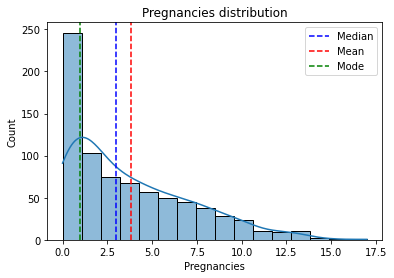

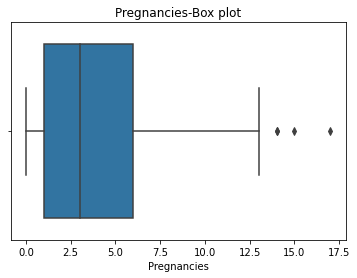

Analysis of Glucose

Median:  117.0
Mean:  121.68676277850591
Mode:  0     99.0
1    100.0
Name: Glucose, dtype: float64
Variance:  926.346983447279
Standard deviation:  30.435948867207657
Skewness:  0.5327186599872982
Q1:  99.75
Q3:  140.25
============================Graph here============================


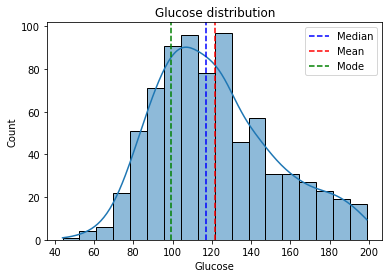

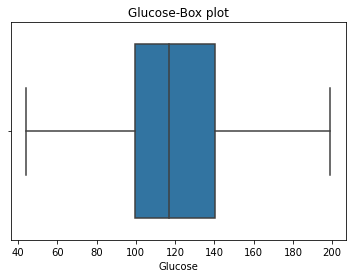

Analysis of BloodPressure

Median:  72.20259208731241
Mean:  72.40518417462482
Mode:  0    70.0
Name: BloodPressure, dtype: float64
Variance:  146.32159100408919
Standard deviation:  12.096346184037937
Skewness:  0.13730536744146796
Q1:  64.0
Q3:  80.0
============================Graph here============================


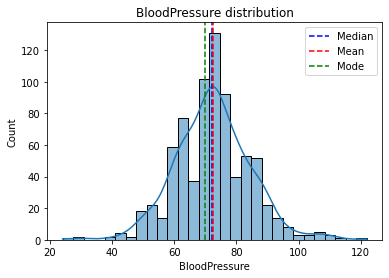

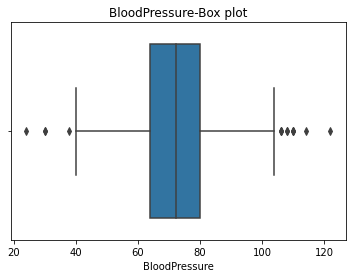

Analysis of SkinThickness

Median:  29.0
Mean:  29.108072916666668
Mode:  0    29.0
Name: SkinThickness, dtype: float64
Variance:  77.28556707681442
Standard deviation:  8.791221023089706
Skewness:  0.8376083316006523
Q1:  25.0
Q3:  32.0
============================Graph here============================


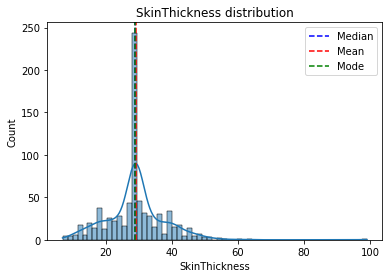

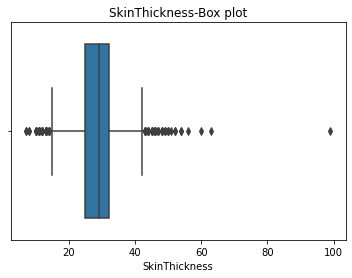

Analysis of Insulin

Median:  125.0
Mean:  140.671875
Mode:  0    125.0
Name: Insulin, dtype: float64
Variance:  7462.033001955671
Standard deviation:  86.383059693181
Skewness:  3.380019128212173
Q1:  121.5
Q3:  127.25
============================Graph here============================


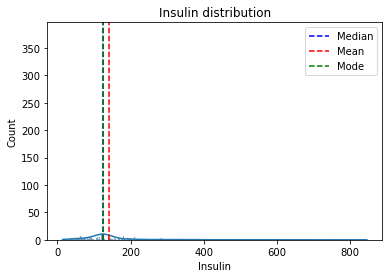

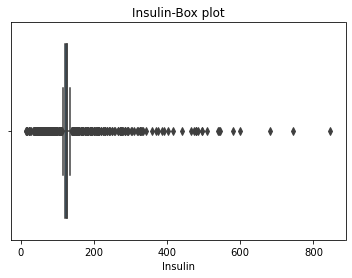

Analysis of BMI

Median:  32.3
Mean:  32.45520833333333
Mode:  0    32.3
Name: BMI, dtype: float64
Variance:  47.268056279878316
Standard deviation:  6.875176818080995
Skewness:  0.599232520287425
Q1:  27.5
Q3:  36.6
============================Graph here============================


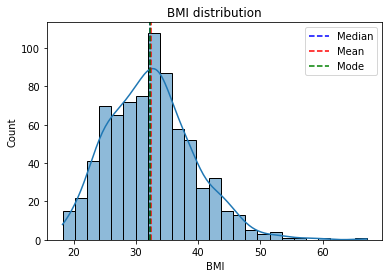

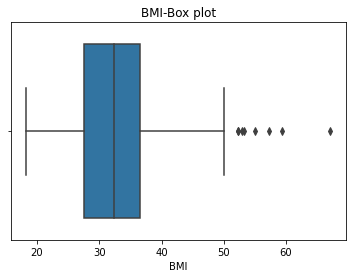

Analysis of DiabetesPedigreeFunction

Median:  0.3725
Mean:  0.47187630208333325
Mode:  0    0.254
1    0.258
Name: DiabetesPedigreeFunction, dtype: float64
Variance:  0.1097786378731394
Standard deviation:  0.3313285950127749
Skewness:  1.919911066307204
Q1:  0.24375
Q3:  0.62625
============================Graph here============================


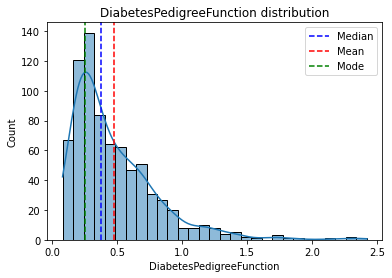

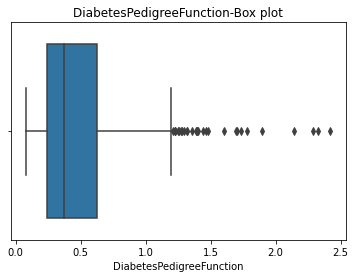

Analysis of Age

Median:  29.0
Mean:  33.240885416666664
Mode:  0    22
Name: Age, dtype: int64
Variance:  138.30304589037377
Standard deviation:  11.760231540678685
Skewness:  1.1295967011444805
Q1:  24.0
Q3:  41.0
============================Graph here============================


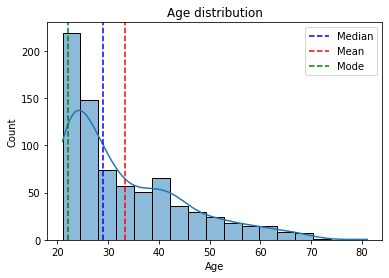

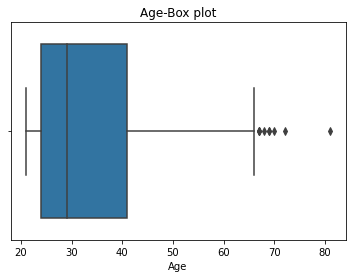

In [35]:
for i in features:
    descriptive_analysis(i)

### 4.2 Visualize the feature correlations

<AxesSubplot:>

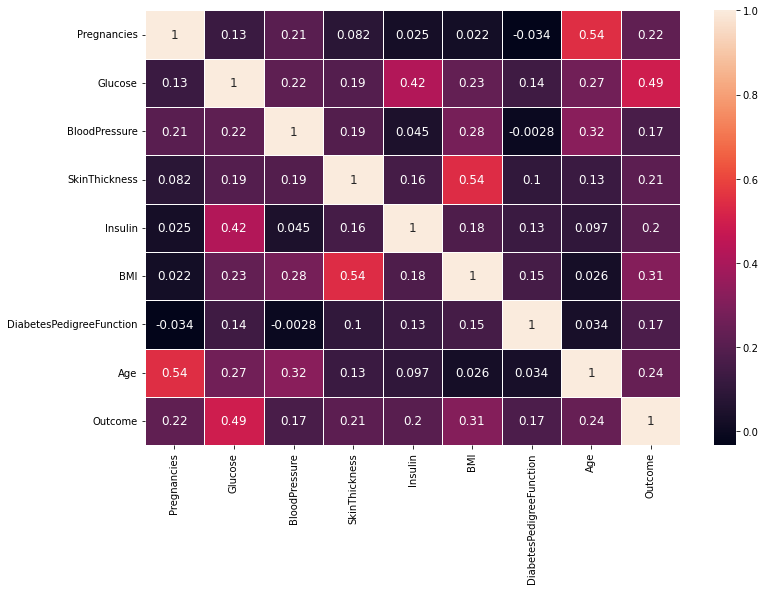

In [36]:
# Compute the correlation heatmap
corr = df.corr()
plt.figure(figsize=(12,8))  
sns.heatmap(corr,annot=True, annot_kws={"size":12}, linewidth = 0.5)
#plt.savefig('Correlation Matrix.png')

In [37]:
X = sm.add_constant(df['Age'])
model = sm.OLS(df['BloodPressure'], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          BloodPressure   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     90.21
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           2.66e-20
Time:                        21:52:39   Log-Likelihood:                -2961.0
No. Observations:                 768   AIC:                             5926.
Df Residuals:                     766   BIC:                             5935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.3070      1.239     49.467      0.000      58.874      63.740
Age            0.3339      0.035      9.498      0.000       0.265       0.403
==============================================================================
Omnibus:                       28.704   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.425
Skew:                           0.197   Prob(JB):                     7.57e-14
Kurtosis:                       4.316   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X = sm.add_constant(df['Glucose'])
model = sm.OLS(df['BloodPressure'], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          BloodPressure   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     38.35
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           9.62e-10
Time:                        21:52:39   Log-Likelihood:                -2985.0
No. Observations:                 768   AIC:                             5974.
Df Residuals:                     766   BIC:                             5983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.8444      1.758     35.185      0.000      58.394      65.295
Glucose        0.0868      0.014      6.193      0.000       0.059       0.114
==============================================================================
Omnibus:                       21.861   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.538
Skew:                           0.131   Prob(JB):                     3.51e-10
Kurtosis:                       4.137   Cond. No.                         517.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
df['GlucoseLevel'].value_counts()

Normal         576
Prediabetes    192
Diabetes         0
Name: GlucoseLevel, dtype: int64

In [40]:
df['Test'].value_counts()

Negative    500
Positive    268
Name: Test, dtype: int64

### 4.3 Visualize relations between a single variable and the diabetes test result

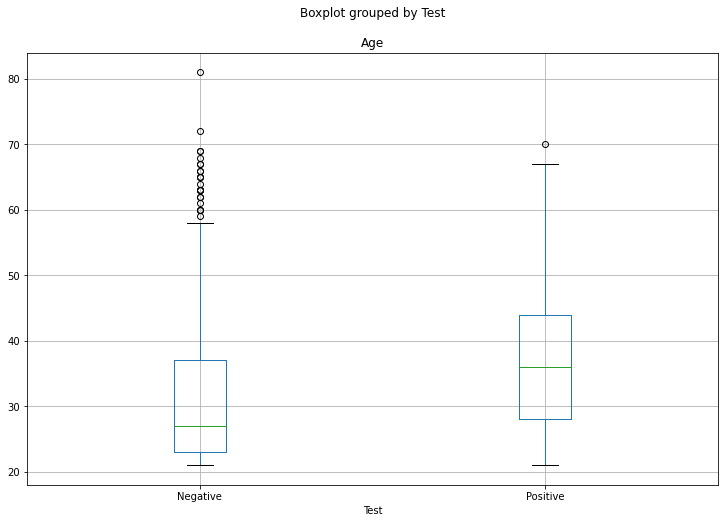

In [41]:
#Create boxplot to see the data distribution of Age by Test Result
df.boxplot('Age', by='Test',figsize=(12,8))
plt.show()

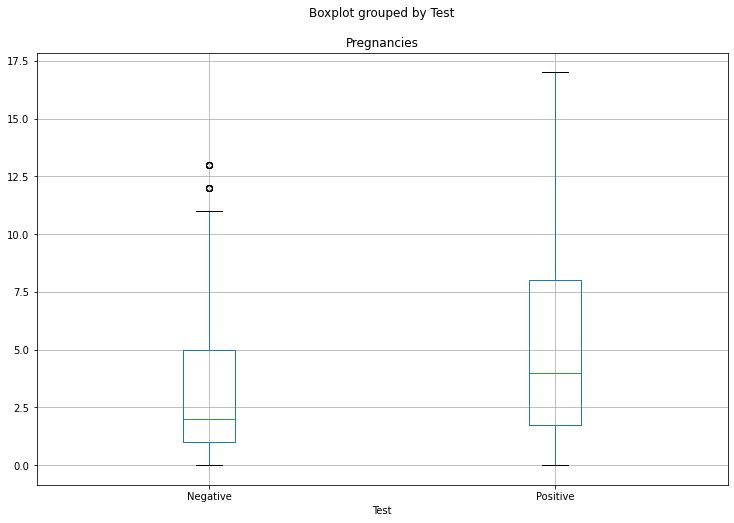

In [42]:
#Create boxplot to see the data distribution of Pregnancies by Test Result
df.boxplot('Pregnancies', by='Test',figsize=(12,8))
plt.show()

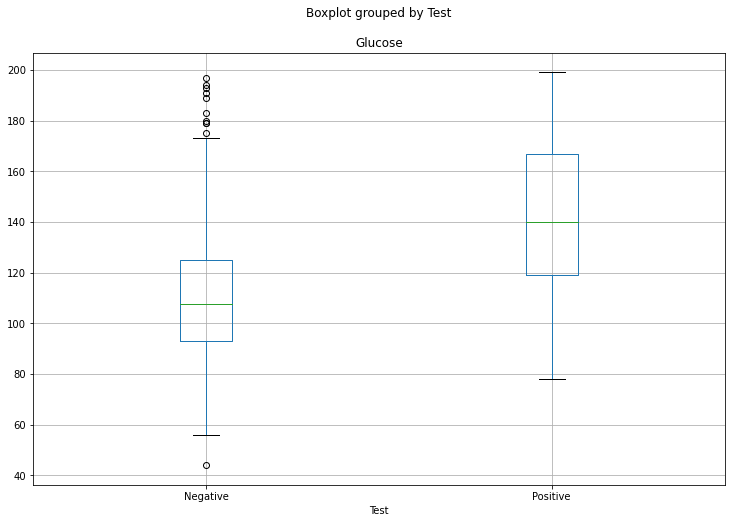

In [43]:
#Create boxplot to see the data distribution of Glucose by Test Result
df.boxplot('Glucose', by='Test',figsize=(12,8))
plt.show()

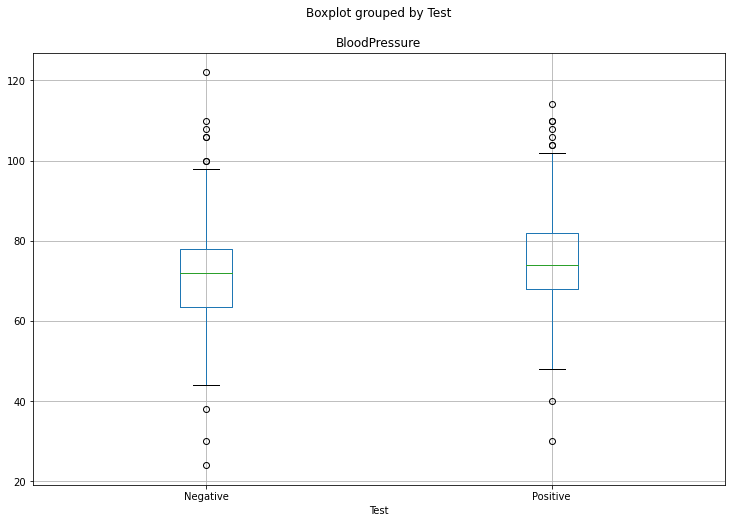

In [44]:
#Create boxplot to see the data distribution of BloodPressure, by Test Result
df.boxplot('BloodPressure', by='Test',figsize=(12,8))
plt.show()

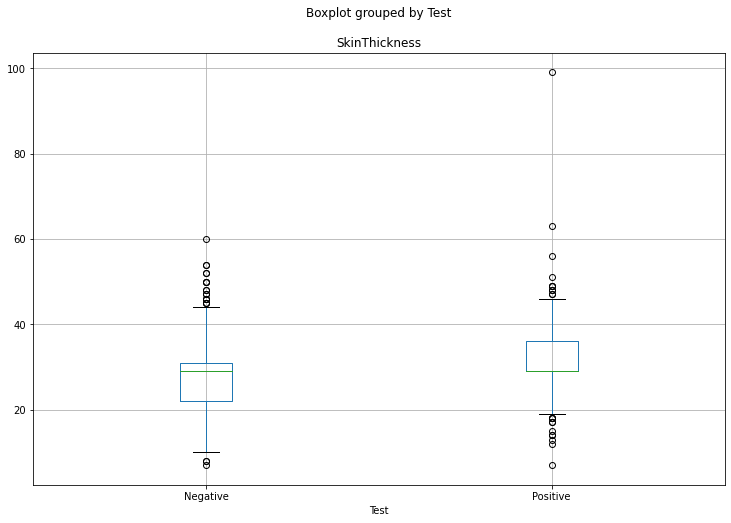

In [45]:
#Create boxplot to see the data distribution of SkinThickness, by Test Result
df.boxplot('SkinThickness', by='Test',figsize=(12,8))
plt.show()

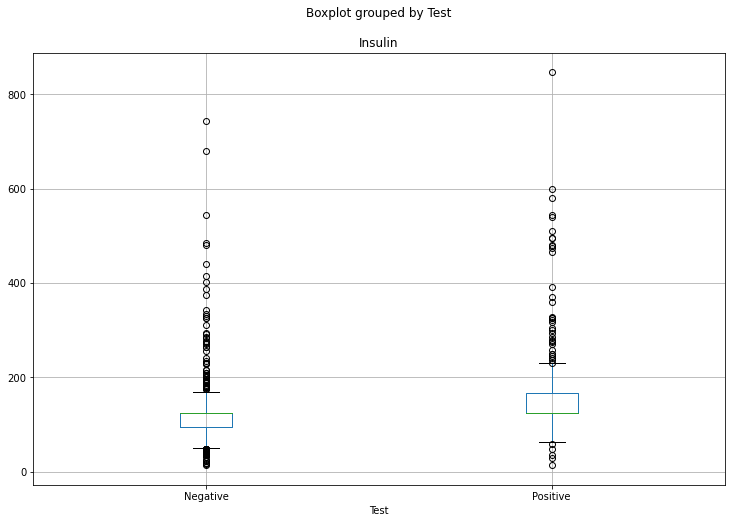

In [46]:
#Create boxplot to see the data distribution of Insulin by Test Result
df.boxplot('Insulin', by='Test',figsize=(12,8))
plt.show()

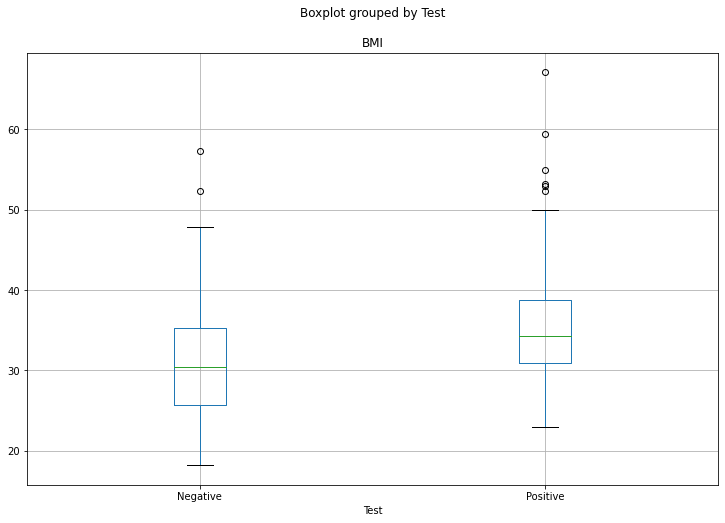

In [47]:
#Create boxplot to see the data distribution of BMI by Test Result
df.boxplot('BMI', by='Test',figsize=(12,8))
plt.show()

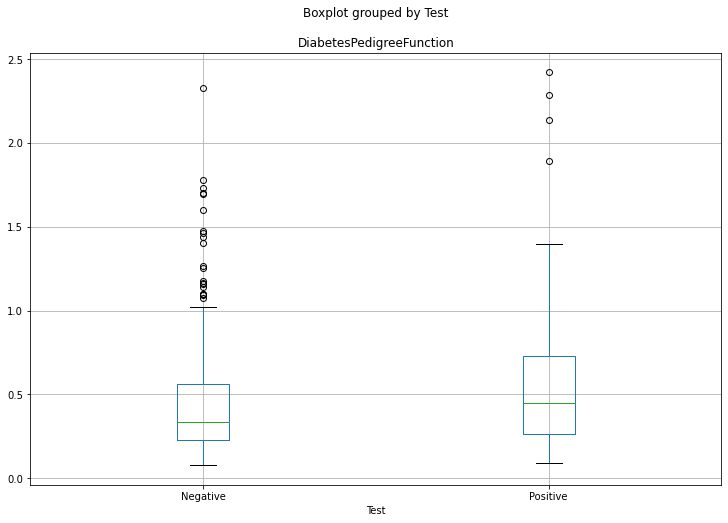

In [48]:
#Create boxplot to see the data distribution of DiabetesPedigreeFunction by Test Result
df.boxplot('DiabetesPedigreeFunction', by='Test',figsize=(12,8))
plt.show()

### 4.4 Visualize the comparison of a single feature between Age Groups

In [49]:
df['AgeGroup'].value_counts()

Young         488
Middle        191
Older          73
Retirement     16
Name: AgeGroup, dtype: int64

In [50]:
matrix = pd.crosstab(df['Outcome'], df['AgeGroup'])
matrix

AgeGroup  Young  Middle  Older  Retirement
Outcome                                   
0           362      92     34          12
1           126      99     39           4

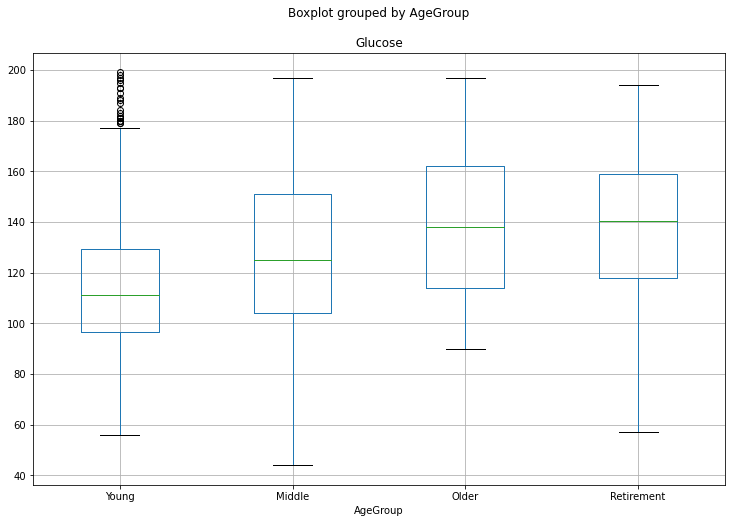

In [51]:
#Create boxplot to see the data distribution of Glucose by Age Groups
df.boxplot('Glucose', by='AgeGroup',figsize=(12,8))
plt.show()

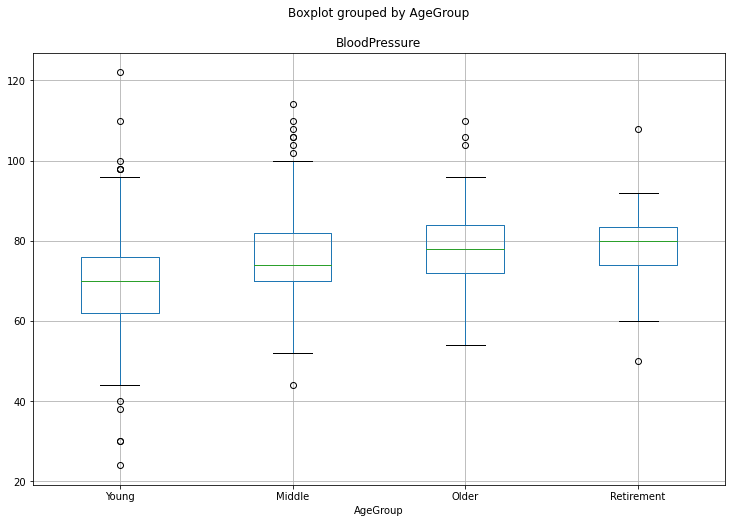

In [52]:
#Create boxplot to see the data distribution of BloodPressure by Age Groups
df.boxplot('BloodPressure', by='AgeGroup',figsize=(12,8))
plt.show()

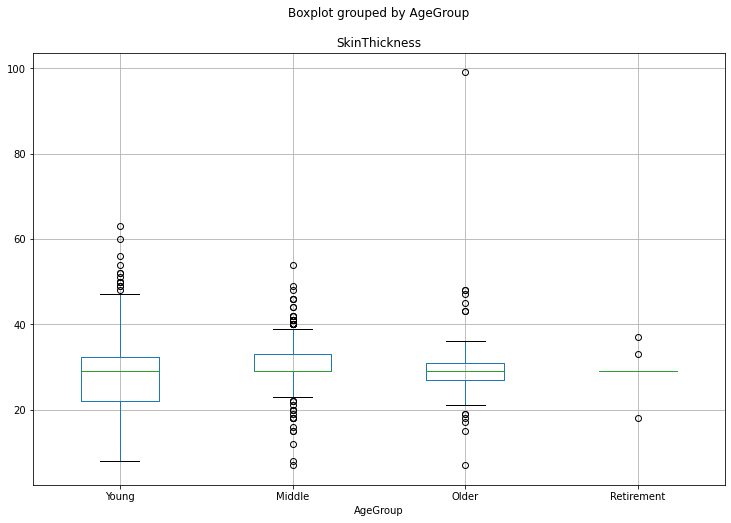

In [53]:
#Create boxplot to see the data distribution of SkinThickness by Age Groups
df.boxplot('SkinThickness', by='AgeGroup',figsize=(12,8))
plt.show()

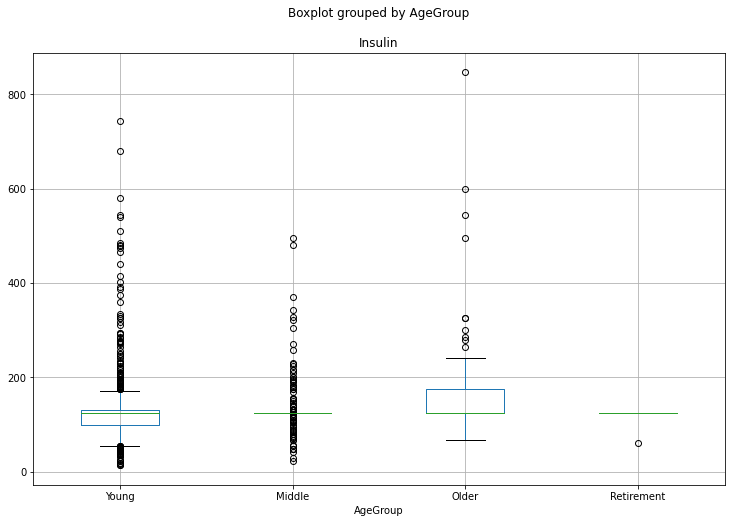

In [54]:
#Create boxplot to see the data distribution of Glucose by Age Groups
df.boxplot('Insulin', by='AgeGroup',figsize=(12,8))
plt.show()

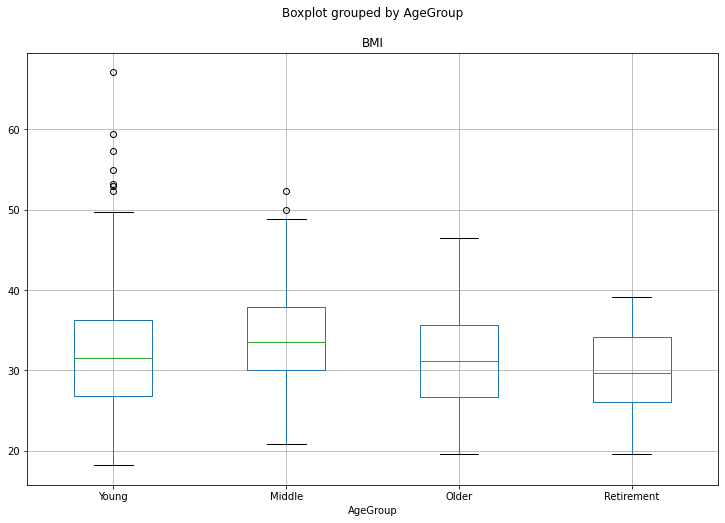

In [55]:
#Create boxplot to see the data distribution of BMI by Age Groups
df.boxplot('BMI', by='AgeGroup',figsize=(12,8))
plt.show()

### 4.5 Hypothesis Test

Student’s t-test: Any difference between the mean Blood Pressure of people with diabetes and people without diabetes under the t-test of 5% significance level.

Hypothesis statements:

H0: μ1 = μ2 (mean Blood Pressure of people with diabetes equal with mean Blood Pressure of people without diabetes)

H1: μ1 ≠ μ2 (mean Blood Pressure of people with diabetes differ from mean Blood Pressure of people without diabetes)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   GlucoseLevel              768 non-null    category
 3   BloodPressure             768 non-null    float64 
 4   SkinThickness             768 non-null    float64 
 5   Insulin                   768 non-null    float64 
 6   BMI                       768 non-null    float64 
 7   DiabetesPedigreeFunction  768 non-null    float64 
 8   Age                       768 non-null    int64   
 9   AgeGroup                  768 non-null    category
 10  Outcome                   768 non-null    int64   
 11  Test                      768 non-null    category
dtypes: category(3), float64(6), int64(3)
memory usage: 56.8 KB


In [57]:
summary = df.groupby('Outcome')['BloodPressure'].describe()
summary

count       mean        std   min   25%   50%   75%    max
Outcome                                                            
0        500.0  70.935397  11.931033  24.0  63.5  72.0  78.0  122.0
1        268.0  75.147324  11.945712  30.0  68.0  74.0  82.0  114.0

In [58]:
negative =df[(df['Outcome'] == 0)]
positive = df[(df['Outcome'] == 1)]

In [59]:
#calculate difference of the parameter estimate between blood pressure of people with diabetes and without diabetes
diff_samplemean = np.mean(positive['BloodPressure']) - np.mean(negative['BloodPressure'])  
diff_samplemean

4.211927429700069

In [60]:
pg.compute_effsize(negative['BloodPressure'], positive['BloodPressure'], eftype='eta-square')

0.03018977271573692

In [61]:
pg.compute_effsize(negative['BloodPressure'], positive['BloodPressure'], eftype='cohen')

-0.3528714625840711

Before the t-test can be conducted, one needs to test the assumptions. First to test for the homogeneity of variances. To do this, I will use Levene’s test for homogeneity of variance. The method to conduct this test is stats.levene().

from source: https://pythonfordatascienceorg.wordpress.com/independent-t-test-python/

In [62]:
stats.levene(negative['BloodPressure'], positive['BloodPressure'])

LeveneResult(statistic=0.16393989544554366, pvalue=0.6856677964213963)

Next to test the assumption of normality. 

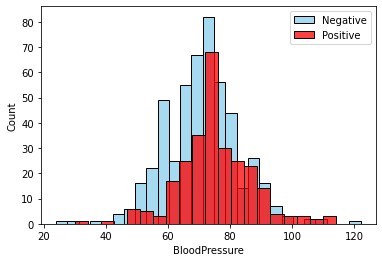

In [63]:
#Test the assumption of normality by visualizing the distribution
sns.histplot(negative['BloodPressure'], color="skyblue", label="Negative")
sns.histplot(positive['BloodPressure'], color="red", label="Positive")
plt.legend()
#plt.savefig('Blood Pressure for people with & without diabetes.png')

Text(0.5, 1.0, 'BloodPressure value Q-Q Plot')

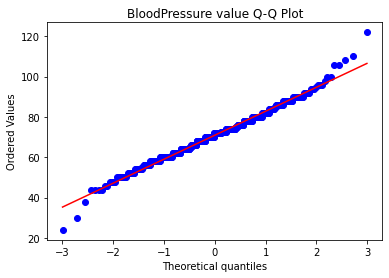

In [64]:
stats.probplot(negative['BloodPressure'], dist="norm", plot= plt)
plt.title("BloodPressure value Q-Q Plot")
#plt.savefig("test_negative_for_diabetes_qqplot.png")

Text(0.5, 1.0, 'BloodPressure value Q-Q Plot')

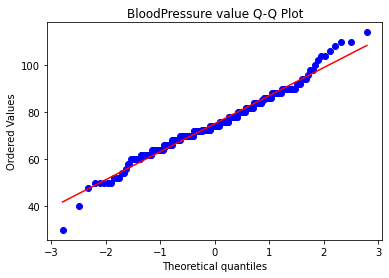

In [65]:
stats.probplot(positive['BloodPressure'], dist="norm", plot= plt)
plt.title("BloodPressure value Q-Q Plot")
#plt.savefig("test_positive_for_diabetes_qqplot.png")

In [66]:
stats.ttest_ind(positive['BloodPressure'], negative['BloodPressure'],equal_var= False)

Ttest_indResult(statistic=4.659365773434451, pvalue=3.990682990682639e-06)

T-test: is mean Blood Pressure of people with biabetes greater than Blood Pressure of people without diabetes under the t-test of 5% significance level.

Hypothesis statements:

H0: μ1 = μ2 (mean Blood Pressure of people with diabetes equal with mean Blood Pressure of people without diabetes)

H1: μ1  > μ2 (mean Blood Pressure of people with diabetes is greater than mean Blood Pressure of people without diabetes)

In [67]:
stats.ttest_ind(positive['BloodPressure'], negative['BloodPressure'], equal_var= False, alternative='greater')

Ttest_indResult(statistic=4.659365773434451, pvalue=1.9953414953413196e-06)

In [68]:
#Given 95% and 99% CI
confidenceLevel_1 = 0.95          
confidenceLevel_2 = 0.99           

In [69]:
#Calculate the sample parameters for blood pressure for people without diabetes
degrees_freedom_1 = len(negative['BloodPressure'])-1    
sampleMean_1 = np.mean(negative['BloodPressure'])         
sampleStandardError_1 = scipy.stats.sem(negative['BloodPressure']) 
#create 95% confidence interval for the population mean
confidenceInterval_1 = scipy.stats.norm.interval(alpha=confidenceLevel_1,loc=sampleMean_1,scale=sampleStandardError_1)
#create 99% confidence interval for the population mean
confidenceInterval_2 = scipy.stats.norm.interval(alpha=confidenceLevel_2,loc=sampleMean_1,scale=sampleStandardError_1)

In [70]:
#Output CI for the true mean blood pressure of people without diabetes.
print('The 95% confidence interval for the population mean blood pressure for poeple without diabetes:',confidenceInterval_1)
print('The 99% confidence interval for the population mean blood pressure for poeple without diabetes:',confidenceInterval_2)

The 95% confidence interval for the population mean blood pressure for poeple without diabetes: (69.88961502717547, 71.98117897009604)
The 99% confidence interval for the population mean blood pressure for poeple without diabetes: (69.56100651571946, 72.30978748155205)


In [71]:
#Calculate the sample parameters for blood pressure for diabetics
degrees_freedom_2 = len(positive['BloodPressure'])-1    
sampleMean_2 = np.mean(positive['BloodPressure'])         
sampleStandardError_2 = scipy.stats.sem(positive['BloodPressure']) 
#create 95% confidence interval for the population mean
confidenceInterval_3 = scipy.stats.norm.interval(alpha=confidenceLevel_1,loc=sampleMean_2,scale=sampleStandardError_2)
#create 99% confidence interval for the population mean
confidenceInterval_4 = scipy.stats.norm.interval(alpha=confidenceLevel_2,loc=sampleMean_2,scale=sampleStandardError_2)

In [72]:
#Output CI for the true mean blood pressure of people with diabetes
print('The 95% confidence interval for the population mean blood pressure for poeple with diabetes:',confidenceInterval_3)
print('The 99% confidence interval for the population mean blood pressure for poeple with diabetes:',confidenceInterval_4)

The 95% confidence interval for the population mean blood pressure for poeple with diabetes: (73.71713767670298, 76.57751117996867)
The 99% confidence interval for the population mean blood pressure for poeple with diabetes: (73.26774042910851, 77.02690842756313)


In [73]:
#Declare a list that is to be converted into a column
CI_L = [round(confidenceInterval_1[0],3),round(confidenceInterval_3[0],3)]
CI_U = [round(confidenceInterval_1[1],3),round(confidenceInterval_3[1],3)]
 
#Using 'Lower Bound' and 'Upper Bound' as the column name and equating it to the list
summary['Lower Bound'] = CI_L
summary['Upper Bound'] = CI_U
 
#Observe the result
summary

count       mean        std   min   25%   50%   75%    max  \
Outcome                                                               
0        500.0  70.935397  11.931033  24.0  63.5  72.0  78.0  122.0   
1        268.0  75.147324  11.945712  30.0  68.0  74.0  82.0  114.0   

         Lower Bound  Upper Bound  
Outcome                            
0             69.890       71.981  
1             73.717       76.578

## 5. Multiple Linear Regression

In [74]:
Y = df.BloodPressure
Y

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64

In [75]:
X = df.drop(['BloodPressure','GlucoseLevel','AgeGroup','Test'], axis =1)
X

Pregnancies  Glucose  SkinThickness  Insulin   BMI  \
0              6    148.0           35.0    125.0  33.6   
1              1     85.0           29.0    125.0  26.6   
2              8    183.0           29.0    125.0  23.3   
3              1     89.0           23.0     94.0  28.1   
4              0    137.0           35.0    168.0  43.1   
..           ...      ...            ...      ...   ...   
763           10    101.0           48.0    180.0  32.9   
764            2    122.0           27.0    125.0  36.8   
765            5    121.0           23.0    112.0  26.2   
766            1    126.0           29.0    125.0  30.1   
767            1     93.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=0) 

In [78]:
X_train.shape, Y_train.shape

((614, 8), (614,))

In [79]:
X_test.shape, Y_test.shape

((154, 8), (154,))

In [80]:
#Import liabrary
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
#Fitting Multiple Linear Regression to the training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [82]:
#Apply trained model to make prediction on test set
Y_pred = regressor.predict(X_test)

In [83]:
compare = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
compare

Actual  Predicted
661    76.0  75.776676
122    74.0  70.274819
113    62.0  69.303174
14     72.0  74.983179
529    65.0  67.367384
..      ...        ...
476    80.0  69.086385
482    58.0  68.502372
230    86.0  74.796316
527    74.0  67.864138
380    72.0  68.425669

[154 rows x 2 columns]

In [84]:
#Print model performance - coefficient
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Pregnancies                  0.108761
Glucose                      0.054161
SkinThickness                0.022343
Insulin                     -0.010941
BMI                          0.482144
DiabetesPedigreeFunction    -2.086753
Age                          0.282852
Outcome                     -1.524326

In [85]:
#Print model performance - Intercept & R^2
print('Intercept:',regressor.intercept_)
print('Coefficient of determination (R^2):%.2f'% r2_score(Y_test, Y_pred))

Intercept: 42.82328474666565
Coefficient of determination (R^2):0.18


In [86]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test,Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE: 8.463705569562846
MSE: 126.2377947095911
RMSE: 11.235559385699988


Text(0, 0.5, 'Predicted Y')

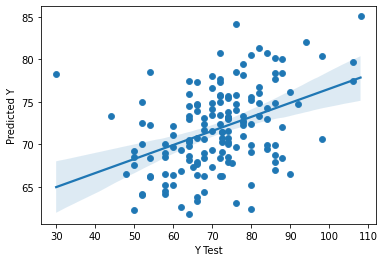

In [87]:
# Create a scatterplot of the real test values versus the predicted values.
sns.scatterplot(x=Y_test,y=Y_pred)
ax = sns.regplot(x=Y_test,y=Y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## 6. Anova Modeling

In [88]:
df

Pregnancies  Glucose GlucoseLevel  BloodPressure  SkinThickness  Insulin  \
0              6    148.0  Prediabetes           72.0           35.0    125.0   
1              1     85.0       Normal           66.0           29.0    125.0   
2              8    183.0  Prediabetes           64.0           29.0    125.0   
3              1     89.0       Normal           66.0           23.0     94.0   
4              0    137.0       Normal           40.0           35.0    168.0   
..           ...      ...          ...            ...            ...      ...   
763           10    101.0       Normal           76.0           48.0    180.0   
764            2    122.0       Normal           70.0           27.0    125.0   
765            5    121.0       Normal           72.0           23.0    112.0   
766            1    126.0       Normal           60.0           29.0    125.0   
767            1     93.0       Normal           70.0           31.0    125.0   

      BMI  DiabetesPedigreeFunction  Age AgeGroup  Outcome      Test  
0    33.6                     0.627   50    Older        1  Positive  
1    26.6                     0.351   31    Young        0  Negative  
2    23.3                     0.672   32    Young        1  Positive  
3    28.1                     0.167   21    Young        0  Negative  
4    43.1                     2.288   33    Young        1  Positive  
..    ...                       ...  ...      ...      ...       ...  
763  32.9                     0.171   63    Older        0  Negative  
764  36.8                     0.340   27    Young        0  Negative  
765  26.2                     0.245   30    Young        0  Negative  
766  30.1                     0.349   47   Middle        1  Positive  
767  30.4                     0.315   23    Young        0  Negative  

[768 rows x 12 columns]

In [89]:
summary_agegroup = df.groupby('AgeGroup')['BloodPressure'].describe()
summary_agegroup

count       mean        std   min   25%   50%   75%    max
AgeGroup                                                              
Young       488.0  69.550276  11.748538  24.0  62.0  70.0  76.0  122.0
Middle      191.0  76.540531  11.127864  44.0  70.0  74.0  82.0  114.0
Older        73.0  79.136986  10.281206  54.0  72.0  78.0  84.0  110.0
Retirement   16.0  79.400324  13.002378  50.0  74.0  80.0  83.5  108.0

In [90]:
Y = df[(df['AgeGroup'] == 'Young')]
M = df[(df['AgeGroup'] == 'Middle')]
O = df[(df['AgeGroup'] == 'Older')]
R = df[(df['AgeGroup'] == 'Retirement')]

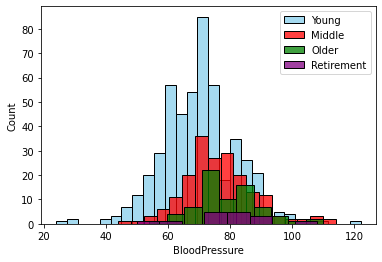

In [91]:
#Test the assumption of normality by visualizing the distribution
sns.histplot(Y['BloodPressure'], color="skyblue", label="Young")
sns.histplot(M['BloodPressure'], color="red", label="Middle")
sns.histplot(O['BloodPressure'], color="green", label="Older")
sns.histplot(R['BloodPressure'], color="purple", label="Retirement")
plt.legend()
#plt.savefig('Blood Pressure for people in four different age groups.png')

In [92]:
#Calculate the sample parameters for blood pressure for people in young age group
degrees_freedom_Y = len(Y['BloodPressure'])-1    
sampleMean_Y = np.mean(Y['BloodPressure'])         
sampleStandardError_Y = scipy.stats.sem(Y['BloodPressure']) 
#create 95% confidence interval for the population mean
CI_Y = scipy.stats.norm.interval(alpha=0.95,loc=sampleMean_Y,scale=sampleStandardError_Y)

In [93]:
#Calculate the sample parameters for blood pressure for people in middle age group
degrees_freedom_M = len(M['BloodPressure'])-1    
sampleMean_M = np.mean(M['BloodPressure'])         
sampleStandardError_M = scipy.stats.sem(M['BloodPressure']) 
#create 95% confidence interval for the population mean
CI_M = scipy.stats.norm.interval(alpha=0.95,loc=sampleMean_M,scale=sampleStandardError_M)

In [94]:
#Calculate the sample parameters for blood pressure for people in older age group
degrees_freedom_O = len(O['BloodPressure'])-1    
sampleMean_O = np.mean(O['BloodPressure'])         
sampleStandardError_O = scipy.stats.sem(O['BloodPressure']) 
#create 95% confidence interval for the population mean
CI_O = scipy.stats.norm.interval(alpha=0.95,loc=sampleMean_O,scale=sampleStandardError_O)

In [95]:
#Calculate the sample parameters for blood pressure for people in retirement age group
degrees_freedom_R = len(R['BloodPressure'])-1    
sampleMean_R = np.mean(R['BloodPressure'])         
sampleStandardError_R = scipy.stats.sem(R['BloodPressure']) 
#create 95% confidence interval for the population mean
CI_R = scipy.stats.norm.interval(alpha=0.95,loc=sampleMean_R,scale=sampleStandardError_R)

In [96]:
#Declare a list that is to be converted into a column
CI_L = [round(CI_Y[0],3),round(CI_M[0],3),round(CI_O[0],3),round(CI_R[0],3)]
CI_U = [round(CI_Y[1],3),round(CI_M[1],3),round(CI_O[1],3),round(CI_R[1],3)]
 
#Using 'Lower Bound' and 'Upper Bound' as the column name and equating it to the list
summary_agegroup['Lower Bound'] = CI_L
summary_agegroup['Upper Bound'] = CI_U
 
#Observe the result
summary_agegroup

count       mean        std   min   25%   50%   75%    max  \
AgeGroup                                                                 
Young       488.0  69.550276  11.748538  24.0  62.0  70.0  76.0  122.0   
Middle      191.0  76.540531  11.127864  44.0  70.0  74.0  82.0  114.0   
Older        73.0  79.136986  10.281206  54.0  72.0  78.0  84.0  110.0   
Retirement   16.0  79.400324  13.002378  50.0  74.0  80.0  83.5  108.0   

            Lower Bound  Upper Bound  
AgeGroup                              
Young            68.508       70.593  
Middle           74.962       78.119  
Older            76.779       81.495  
Retirement       73.029       85.771

### 6.1 Conduct a two-way ANOVA test

<AxesSubplot:xlabel='AgeGroup', ylabel='BloodPressure'>

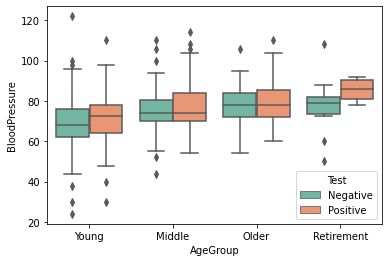

In [97]:
#Generate a boxplot to see the data distribution by Age Group and Test Result
sns.boxplot(x="AgeGroup", y="BloodPressure", hue="Test", data=df, palette="Set2")
#plt.savefig('data distribution of Blood Pressure by AgeGroups and Test Outcomes.png')

In [98]:
#Conduct 2 way Anova, output the table
model = ols('BloodPressure~ C(AgeGroup) + C(Test) + C(AgeGroup):C(Test)',df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

sum_sq     df             F        PR(>F)
Intercept            1.715085e+06    1.0  13062.838841  0.000000e+00
C(AgeGroup)          5.948756e+03    3.0     15.102779  1.481417e-09
C(Test)              7.239284e+02    1.0      5.513756  1.912291e-02
C(AgeGroup):C(Test)  1.499345e+02    3.0      0.380656  7.669798e-01
Residual             9.978417e+04  760.0           NaN           NaN

In [99]:
#Get eta sqaured and omega sqaured effect sizes and add it to the anova table
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov


eta_squared(anova_table)
omega_squared(anova_table)

anova_table.round(6)

sum_sq     df             F    PR(>F)    eta_sq  \
Intercept            1.715085e+06    1.0  13062.838841  0.000000  0.941479   
C(AgeGroup)          5.948756e+03    3.0     15.102779  0.000000  0.003266   
C(Test)              7.239284e+02    1.0      5.513756  0.019123  0.000397   
C(AgeGroup):C(Test)  1.499345e+02    3.0      0.380656  0.766980  0.000082   
Residual             9.978417e+04  760.0           NaN       NaN       NaN   

                     omega_sq  
Intercept            0.941339  
C(AgeGroup)          0.003049  
C(Test)              0.000325  
C(AgeGroup):C(Test) -0.000134  
Residual                  NaN


### 6.2 Multiple pairwise comparisons (Post-hoc test)

In [100]:
pip install bioinfokit 

Note: you may need to restart the kernel to use updated packages.


In [101]:
#Import bioinfokit (v1.0.3 or later) for performing tukey HSD test
from bioinfokit.analys import stat

In [102]:
#Post hoc test for main effect Age 
res = stat()
res.tukey_hsd(df, res_var='BloodPressure', xfac_var='AgeGroup', anova_model='BloodPressure ~ C(AgeGroup) + C(Test) + C(AgeGroup):C(Test)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1      group2      Diff     Lower      Upper    q-value   p-value
0   Older       Young  9.586710  5.884418  13.289002   9.428671  0.001000
1   Older      Middle  2.596455 -1.463156   6.656066   2.328884  0.353520
2   Older  Retirement  0.263338 -7.880594   8.407270   0.117742  0.900000
3   Young      Middle  6.990255  4.472179   9.508331  10.108243  0.001000
4   Young  Retirement  9.850048  2.354456  17.345639   4.785022  0.004182
5  Middle  Retirement  2.859793 -4.818578  10.538163   1.356179  0.747043

In [103]:
#post hoc test for main effect Test result
res.tukey_hsd(df, res_var='BloodPressure', xfac_var='Test', anova_model='BloodPressure ~ C(AgeGroup) + C(AgeGroup) + C(GlucoseLevel):C(AgeGroup)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '


group1    group2      Diff     Lower     Upper   q-value  p-value
0  Positive  Negative  4.211927  2.515011  5.908844  6.890897    0.001

In [104]:
#For interaction effect between age and diabetes test result
res.tukey_hsd(df, res_var='BloodPressure', xfac_var=['AgeGroup','Test'], anova_model='BloodPressure ~ C(AgeGroup) + C(AgeGroup) + C(GlucoseLevel):C(AgeGroup)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '


group1                  group2       Diff      Lower  \
0        (Older, Positive)       (Older, Negative)   2.018100  -6.124488   
1        (Older, Positive)       (Young, Positive)   8.462185   2.103062   
2        (Older, Positive)       (Young, Negative)  11.245217   5.396529   
3        (Older, Positive)      (Middle, Positive)   2.793833  -3.767052   
4        (Older, Positive)      (Middle, Negative)   4.335450  -2.295599   
5        (Older, Positive)  (Retirement, Positive)   5.423077 -12.796770   
6        (Older, Positive)  (Retirement, Negative)   2.709824  -8.746227   
7        (Older, Negative)       (Young, Positive)   6.444085  -0.262602   
8        (Older, Negative)       (Young, Negative)   9.227117   3.002299   
9        (Older, Negative)      (Middle, Positive)   0.775733  -6.122558   
10       (Older, Negative)      (Middle, Negative)   2.317350  -4.647707   
11       (Older, Negative)  (Retirement, Positive)   7.441176 -10.902870   
12       (Older, Negative)  (Retirement, Negative)   0.691725 -10.960843   
13       (Young, Positive)       (Young, Negative)   2.783032  -0.806544   
14       (Young, Positive)      (Middle, Positive)   5.668352   1.007544   
15       (Young, Positive)      (Middle, Negative)   4.126735  -0.632332   
16       (Young, Positive)  (Retirement, Positive)  13.885262  -3.739741   
17       (Young, Positive)  (Retirement, Negative)   5.752360  -4.731867   
18       (Young, Negative)      (Middle, Positive)   8.451384   4.515417   
19       (Young, Negative)      (Middle, Negative)   6.909767   2.857925   
20       (Young, Negative)  (Retirement, Positive)  16.668293  -0.779040   
21       (Young, Negative)  (Retirement, Negative)   8.535392  -1.647325   
22      (Middle, Positive)      (Middle, Negative)   1.541617  -3.483868   
23      (Middle, Positive)  (Retirement, Positive)   8.216910  -9.481890   
24      (Middle, Positive)  (Retirement, Negative)   0.084009 -10.523809   
25      (Middle, Negative)  (Retirement, Positive)   9.758527  -7.966402   
26      (Middle, Negative)  (Retirement, Negative)   1.625625  -9.025731   
27  (Retirement, Positive)  (Retirement, Negative)   8.132901 -11.903151   

        Upper   q-value   p-value  
0   10.160687  1.065310  0.900000  
1   14.821307  5.719805  0.001484  
2   17.093904  8.264286  0.001000  
3    9.354718  1.830349  0.900000  
4   10.966498  2.810269  0.491595  
5   23.642924  1.279372  0.900000  
6   14.165876  1.016722  0.900000  
7   13.150772  4.129991  0.070239  
8   15.451935  6.371406  0.001000  
9    7.674025  0.483356  0.900000  
10   9.282407  1.430088  0.900000  
11  25.785223  1.743582  0.900000  
12  12.344292  0.255157  0.900000  
13   6.372608  3.332506  0.264668  
14  10.329159  5.227470  0.005715  
15   8.885802  3.727182  0.144689  
16  31.510265  3.386264  0.245274  
17  16.236588  2.358335  0.682438  
18  12.387350  9.229376  0.001000  
19  10.961609  7.330047  0.001000  
20  34.115626  4.106369  0.073546  
21  18.718109  3.602929  0.177032  
22   6.567101  1.318543  0.900000  
23  25.915709  1.995541  0.835333  
24  10.691826  0.034040  0.900000  
25  27.483455  2.366441  0.679021  
26  12.276982  0.656011  0.900000  
27  28.168954  1.744734  0.900000

### 6.3 Test ANOVA assumptions

In [105]:
#Use Shapiro-Wilk to validate the assumptions for homogeneity of variances and normal distribution of residuals 
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)

0.986817479133606 2.1179605482757324e-06


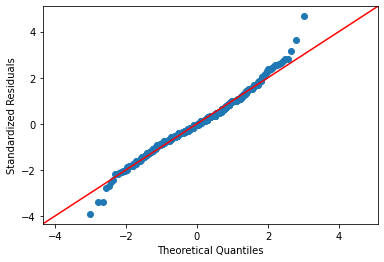

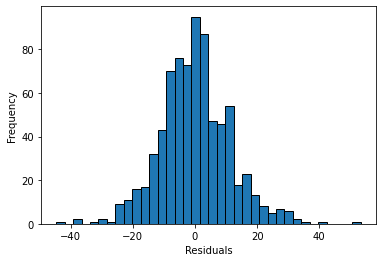

In [106]:
#Visual Approaches to validate the assumptions for homogeneity of variances and normal distribution of residuals
#Create residual plots 
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

#Create histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [107]:
#Use Levene’s test to check the assumption of homogeneity of variances
res = stat()
res.levene(df, res_var='BloodPressure', xfac_var=['AgeGroup', 'Test'])
res.levene_summary

Parameter   Value
0      Test statistics (W)  0.4747
1  Degrees of freedom (Df)  7.0000
2                  p value  0.8533

## 7. ANCOVA 

In [108]:
df

Pregnancies  Glucose GlucoseLevel  BloodPressure  SkinThickness  Insulin  \
0              6    148.0  Prediabetes           72.0           35.0    125.0   
1              1     85.0       Normal           66.0           29.0    125.0   
2              8    183.0  Prediabetes           64.0           29.0    125.0   
3              1     89.0       Normal           66.0           23.0     94.0   
4              0    137.0       Normal           40.0           35.0    168.0   
..           ...      ...          ...            ...            ...      ...   
763           10    101.0       Normal           76.0           48.0    180.0   
764            2    122.0       Normal           70.0           27.0    125.0   
765            5    121.0       Normal           72.0           23.0    112.0   
766            1    126.0       Normal           60.0           29.0    125.0   
767            1     93.0       Normal           70.0           31.0    125.0   

      BMI  DiabetesPedigreeFunction  Age AgeGroup  Outcome      Test  
0    33.6                     0.627   50    Older        1  Positive  
1    26.6                     0.351   31    Young        0  Negative  
2    23.3                     0.672   32    Young        1  Positive  
3    28.1                     0.167   21    Young        0  Negative  
4    43.1                     2.288   33    Young        1  Positive  
..    ...                       ...  ...      ...      ...       ...  
763  32.9                     0.171   63    Older        0  Negative  
764  36.8                     0.340   27    Young        0  Negative  
765  26.2                     0.245   30    Young        0  Negative  
766  30.1                     0.349   47   Middle        1  Positive  
767  30.4                     0.315   23    Young        0  Negative  

[768 rows x 12 columns]

In [109]:
#Summary statistics for dependent varaible - Blood Pressure by age group
df.groupby('AgeGroup')['BloodPressure'].describe()

count       mean        std   min   25%   50%   75%    max
AgeGroup                                                              
Young       488.0  69.550276  11.748538  24.0  62.0  70.0  76.0  122.0
Middle      191.0  76.540531  11.127864  44.0  70.0  74.0  82.0  114.0
Older        73.0  79.136986  10.281206  54.0  72.0  78.0  84.0  110.0
Retirement   16.0  79.400324  13.002378  50.0  74.0  80.0  83.5  108.0

In [110]:
#Summary statistics for covariate - Glucose by age group
df.groupby('AgeGroup')['Glucose'].describe()

count        mean        std   min     25%    50%     75%    max
AgeGroup                                                                    
Young       488.0  116.432501  27.859494  56.0   96.75  111.0  129.25  199.0
Middle      191.0  126.787296  32.754736  44.0  104.00  125.0  151.00  197.0
Older        73.0  140.095890  29.578598  90.0  114.00  138.0  162.00  197.0
Retirement   16.0  137.062500  35.327928  57.0  117.75  140.5  158.75  194.0

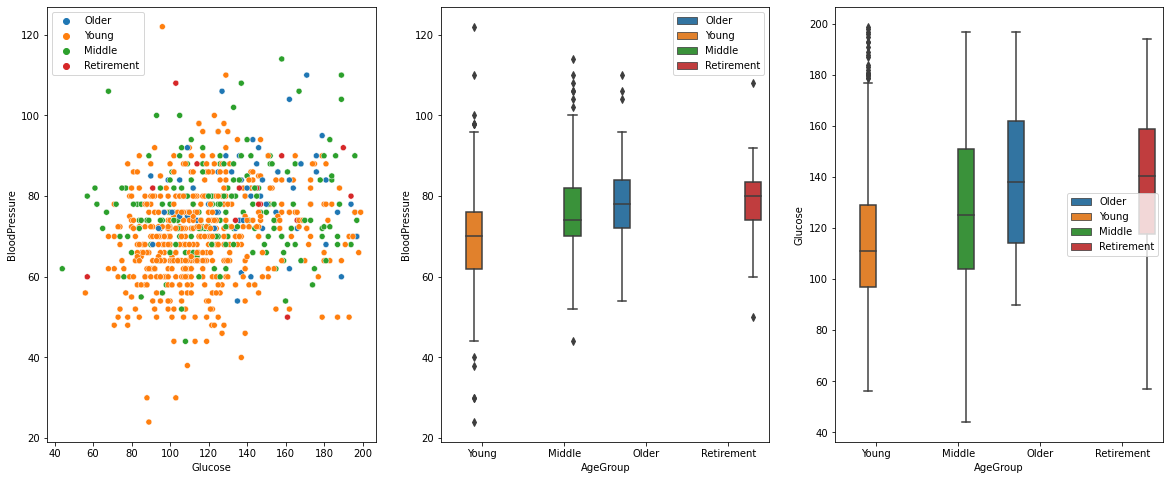

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3,figsize=(20,8))
sns.scatterplot(data=df,x="Glucose",y="BloodPressure",hue=df.AgeGroup.tolist(), ax=axs[0])
sns.boxplot(data=df,x="AgeGroup",y="BloodPressure",hue=df.AgeGroup.tolist(), ax=axs[1])
sns.boxplot(data=df,x="AgeGroup",y="Glucose",hue=df.AgeGroup.tolist(), ax=axs[2])
plt.show()

In [112]:
#Summary statistics for dependent varaible - Blood Pressure by diabetes test result
df.groupby('Test')['BloodPressure'].describe()

count       mean        std   min   25%   50%   75%    max
Test                                                                
Negative  500.0  70.935397  11.931033  24.0  63.5  72.0  78.0  122.0
Positive  268.0  75.147324  11.945712  30.0  68.0  74.0  82.0  114.0

In [113]:
#Summary statistics for covariate - Age by diabetes test result
df.groupby('Test')['Age'].describe()

count       mean        std   min   25%   50%   75%   max
Test                                                               
Negative  500.0  31.190000  11.667655  21.0  23.0  27.0  37.0  81.0
Positive  268.0  37.067164  10.968254  21.0  28.0  36.0  44.0  70.0

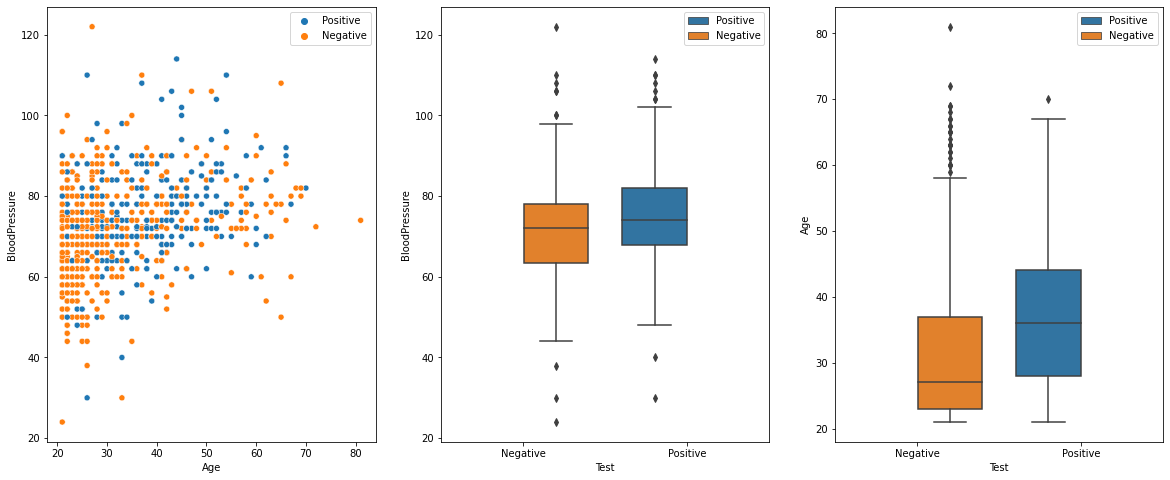

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3,figsize=(20,8))
sns.scatterplot(data=df,x="Age",y="BloodPressure",hue=df.Test.tolist(), ax=axs[0])
sns.boxplot(data=df,x="Test",y="BloodPressure",hue=df.Test.tolist(), ax=axs[1])
sns.boxplot(data=df,x="Test",y="Age",hue=df.Test.tolist(), ax=axs[2])
plt.show()

### 7.1 Conduct a ANCOVA test

Now, let's perform an ANCOVA using the following variables:
- Factor variable: Age Group
- Covariate: Glucose
- Response variable: Blood Pressure

ANCOVA Hypotheses:
- Null hypothesis: Means of all blood pressure are equal after controlling the effect of glucose i.e. adjusted means are equal
   
- Alternative hypothesis: At least, one blood pressure mean is different from other age groups after controlling the effect of glucose i.e. adjusted means are not equal

In [116]:
#building ancova model
ancova_table_1 = ancova(data=df, dv='BloodPressure', covar='Glucose', between='AgeGroup')
ancova_table_1

Source            SS   DF          F         p-unc       np2
0  AgeGroup   8340.206899    3  21.526880  2.161757e-13  0.078035
1   Glucose   2356.913359    1  18.250263  2.181803e-05  0.023360
2  Residual  98536.929542  763        NaN           NaN       NaN

In [117]:
#Verify with ANCOVA from ols
import statsmodels.formula.api as smf
ols_ancova = smf.ols(formula='BloodPressure ~ AgeGroup + Glucose', data=df).fit()
aov_1 = sm.stats.anova_lm(ols_ancova, typ=3)
print(aov_1)

                  sum_sq     df            F         PR(>F)
Intercept  174386.399021    1.0  1350.324422  5.834397e-171
AgeGroup     8340.206899    3.0    21.526880   2.161757e-13
Glucose      2356.913359    1.0    18.250263   2.181803e-05
Residual    98536.929542  763.0          NaN            NaN


In [118]:
ancova_table_1.round(6)

Source            SS   DF          F     p-unc       np2
0  AgeGroup   8340.206899    3  21.526880  0.000000  0.078035
1   Glucose   2356.913359    1  18.250263  0.000022  0.023360
2  Residual  98536.929542  763        NaN       NaN       NaN

Now, let's perform an ANCOVA using the following variables:
- Factor variable: Test Result
- Covariate: Age
- Response variable: Blood Pressure

ANCOVA Hypotheses:
- Null hypothesis: Means of all blood pressure are equal after controlling the age
- Alternative hypothesis: blood pressure ressure mean of people with diabetes is different from people with after controlling the effect of age i.e. adjusted means are not equal

In [119]:
#building ancova model
ancova_table_2 = ancova(data=df, dv='BloodPressure', covar='Age', between='Test')
ancova_table_2

Source            SS   DF          F         p-unc       np2
0      Test    936.262796    1   7.200734  7.444847e-03  0.009325
1       Age   9665.566340    1  74.337223  3.762552e-17  0.088567
2  Residual  99467.775499  765        NaN           NaN       NaN

In [120]:
#Verify with ANCOVA from ols
import statsmodels.formula.api as smf
ols_ancova = smf.ols(formula='BloodPressure ~ Test + Age', data=df).fit()
aov_2 = sm.stats.anova_lm(ols_ancova, typ=3)
print(aov_2)

                  sum_sq     df            F         PR(>F)
Intercept  319920.638712    1.0  2460.488207  3.029108e-241
Test          936.262796    1.0     7.200734   7.444847e-03
Age          9665.566340    1.0    74.337223   3.762552e-17
Residual    99467.775499  765.0          NaN            NaN


In [121]:
ancova_table_2.round(6)

Source            SS   DF          F     p-unc       np2
0      Test    936.262796    1   7.200734  0.007445  0.009325
1       Age   9665.566340    1  74.337223  0.000000  0.088567
2  Residual  99467.775499  765        NaN       NaN       NaN

### 7.2 Test ANCOVA assumptions

In [122]:
#Y = df[(df['AgeGroup'] == 'Young')]
#M = df[(df['AgeGroup'] == 'Middle')]
#O = df[(df['AgeGroup'] == 'Older')]
#R = df[(df['AgeGroup'] == 'Retirement')]

In [123]:
#Use Bartlett's test to check the assumption of homogeneity of variances
from scipy.stats import bartlett 
stat,p = bartlett(Y['BloodPressure'],M['BloodPressure'],O['BloodPressure'],R['BloodPressure'])
stat,p

(2.9956636484796504, 0.3922942396946495)

In [124]:
#Use Bartlett's test to check the assumption of homogeneity of variances
from scipy.stats import bartlett 
stat,p = bartlett(negative['BloodPressure'],positive['BloodPressure'])
stat,p

(0.000525271126544708, 0.9817150487471593)

In [125]:
#Use interaction terms between age groups and glucose in ANOVA to test the assumption of homogeneity of regression slopes
model = ols('BloodPressure~ C(AgeGroup) + C(Glucose) + C(AgeGroup):C(Glucose)',df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table.round(6)

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 405, but rank is 176
  warnings.warn('covariance of constraints does not have full '


sum_sq     df           F    PR(>F)
Intercept               22077.421712    1.0  167.113563  0.000000
C(AgeGroup)              3448.056208    3.0    8.699943  0.000013
C(Glucose)              17897.595787  135.0    1.003516  0.479661
C(AgeGroup):C(Glucose)  67799.179636  405.0    1.267164  0.025789
Residual                62488.168408  473.0         NaN       NaN

In [126]:
#Use interaction terms between age groups and glucose in ANOVA to test the assumption of homogeneity of regression slopes
model = ols('BloodPressure~ C(Test) + C(Age) + C(Test):C(Age)',df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table.round(6)

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 51, but rank is 44
  warnings.warn('covariance of constraints does not have full '


sum_sq     df            F    PR(>F)
Intercept       258543.481214    1.0  2022.415467  0.000000
C(Test)             74.922788    1.0     0.586072  0.444211
C(Age)           14399.299151   51.0     2.208554  0.000006
C(Test):C(Age)    6716.398521   51.0     1.030156  0.420825
Residual         85907.778194  672.0          NaN       NaN

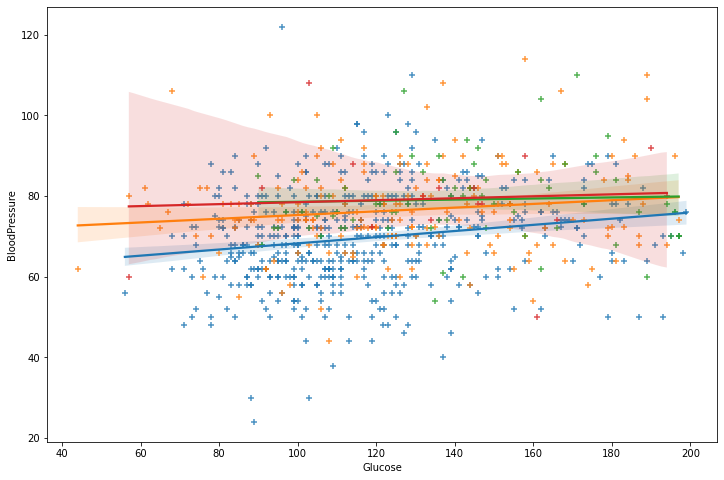

In [127]:
fig, axs = plt.subplots(figsize=(12,8))
ax_1 = sns.regplot(x = Y['Glucose'],y = Y['BloodPressure'],marker="+")
ax_2 = sns.regplot(x = M['Glucose'],y = M['BloodPressure'],marker="+")
ax_3 = sns.regplot(x = O['Glucose'],y = O['BloodPressure'],marker="+")
ax_4 = sns.regplot(x = R['Glucose'],y = R['BloodPressure'],marker="+")


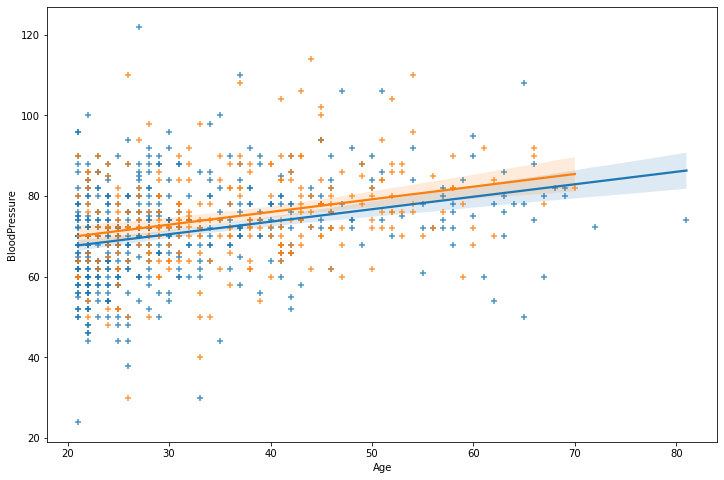

In [128]:
fig, axs = plt.subplots(figsize=(12,8))
ax_1 = sns.regplot(x = negative['Age'],y = negative['BloodPressure'],marker="+")
ax_2 = sns.regplot(x = positive['Age'],y = positive['BloodPressure'],marker="+")

## 8. Power Analysis

In [129]:
from statsmodels.stats.power import TTestIndPower
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

#settings ----
%matplotlib inline
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

In [130]:
#Difference in mean age between people with diabetes and without diabetes using Cohen’s d
es_1 = pg.compute_effsize(positive['Age'], negative['Age'], eftype='cohen')
es_1

0.5142447688829704

In [131]:
#Difference in mean blood pressure between people with diabetes and without diabetes using Cohen’s d
es_2 = pg.compute_effsize(positive['BloodPressure'], negative['BloodPressure'], eftype='cohen')
es_2

0.3528714625840711

### 8.1 Find the required sample size


In [132]:
#parameters for power analysis 
alpha = 0.05 
power = 0.8

In [134]:
#perform power analysis to find sample size for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size= es_1, alpha=alpha, power=power, ratio=1, alternative='two-sided')
  
print("Required Sample Size: " + str(n))

Required Sample Size: 60.33595688740833


In [136]:
#perform power analysis to find sample size for given effect
obj = TTestIndPower()
sample_size = obj.solve_power(effect_size = es_2, power = power, alpha = alpha, ratio=1, alternative='two-sided')

print("Required Sample Size: " + str(sample_size))

Required Sample Size: 127.0351467107799


In [137]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = 0.2, 
                                         power = power, 
                                         alpha = alpha, ratio=1, alternative='two-sided')

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 393.41


In [138]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = 0.5, 
                                         power = power, 
                                         alpha = alpha,ratio=1, alternative='two-sided')

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 63.77


In [139]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = 0.8, 
                                         power = power, 
                                         alpha = alpha,ratio=1, alternative='two-sided')

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


In [140]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = 1.3, 
                                         power = power, 
                                         alpha = alpha,ratio=1, alternative='two-sided')

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 10.34


### 8.2 Power Analysis - 2D sensitivity analysis

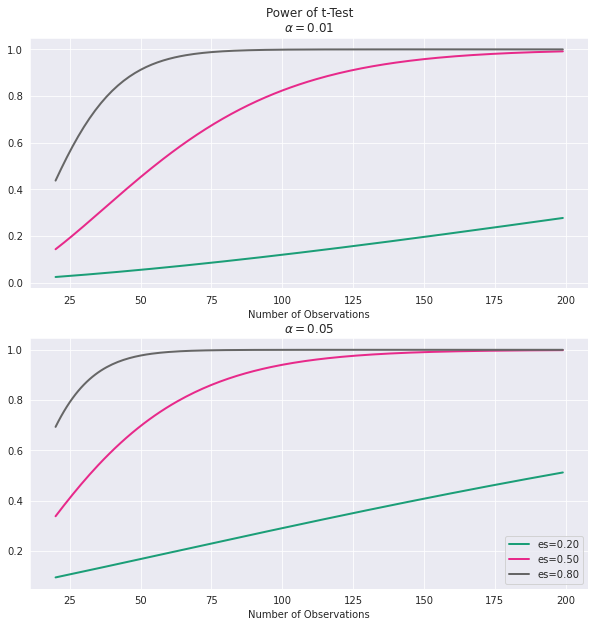

In [141]:
# power vs. sample size
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(20, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(20, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)

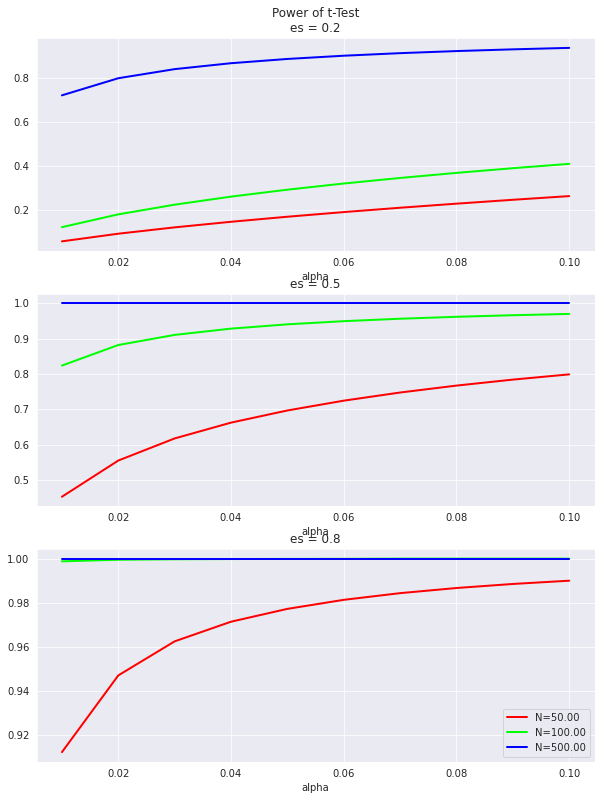

In [142]:
# power vs. significance level

fig = plt.figure()
ax = fig.add_subplot(3,1,1)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 alpha=np.linspace(0.01, 0.1, 10),
                                 effect_size=0.2,
                                 nobs = np.array([50, 100, 500]),
                                 ax = ax, 
                                 title='Power of t-Test' + '\n' + r'es = 0.2')
ax.get_legend().remove()
ax = fig.add_subplot(3,1,2)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 alpha=np.linspace(0.01, 0.1, 10),
                                 effect_size=0.5,
                                 nobs = np.array([50, 100, 500]),
                                 ax = ax, 
                                 title=r'es = 0.5') 
ax.get_legend().remove()
ax = fig.add_subplot(3,1,3)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 alpha=np.linspace(0.01, 0.1, 10),
                                 effect_size=0.8,
                                 nobs = np.array([50, 100, 500]),
                                 ax = ax, 
                                 title=r'es = 0.8')
fig.subplots_adjust(top = 1.8)